# House Prices Data Cleaning

This notebook will entail cleaning the house prices data that I have scraped from domain.com.au.

<b>@DanielBozinovski</b>

### Things to Note from Scraping Data

1. A lot of apartments did not provide a size in squared metres
2. The region of all of these properties lies in New South Wales (NSW)
3. The prices are littered of random text inside each from Domain so they will most likely require the most cleaning


In [26]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv("HouseData.csv") # Read csv

In [28]:
df.head()

,Unnamed: 0,Price,Suburb,Region,Postcode,Address,Size (m^2),Property Type,Beds,Baths,Parking,URL
0,0,"For Sale $1,500,000 - $1,600,000",ROSEBERY,NSW,2018,"1703/4 Mentmore Avenue,",NaN,Apartment / Unit / Flat,3 Beds,2 Baths,2 Parking,https://www.domain.com.au/1703-4-mentmore-aven...
1,1,$570K TO $620K ( SELLIG FAST - SPECTACULAR AP...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
2,2,1 BED + STUDY ( UNDER CONSTRUCTION NOW ),SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,1 Bed,1 Bath,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
3,3,2 BEDROOM $570K ( SELLIG FAST - SPECTACULAR AP...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
4,4,84 SQM INTERNAL ( SELLIG FAST - SPECTACULAR A...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...


In [29]:
# Check what features have missing values
df.isnull().sum()

Unnamed: 0         0
Price              0
Suburb             0
Region             0
Postcode           0
Address          100
Size (m^2)       615
Property Type      0
Beds               3
Baths              3
Parking            3
URL                0
dtype: int64

We see our note from the beginning is proven correct, with a large portion of the missing data begin from the size.

In [30]:
# Get data with empty values
dataWithEmptyValues = df[df.isnull().any(axis=1)]
len(dataWithEmptyValues)

685

In [31]:
# Look at the amounts that each property type has missing data
propertyAmounts = dataWithEmptyValues['Property Type'].value_counts()
propertyAmounts

Apartment / Unit / Flat          381
House                            147
House & Land                      58
New Apartments / Off the Plan     38
Villa                             24
Retirement Living                 12
Semi-Detached                     11
Duplex                             5
Studio                             5
Terrace                            2
Block of Units                     2
Name: Property Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Property Type'>

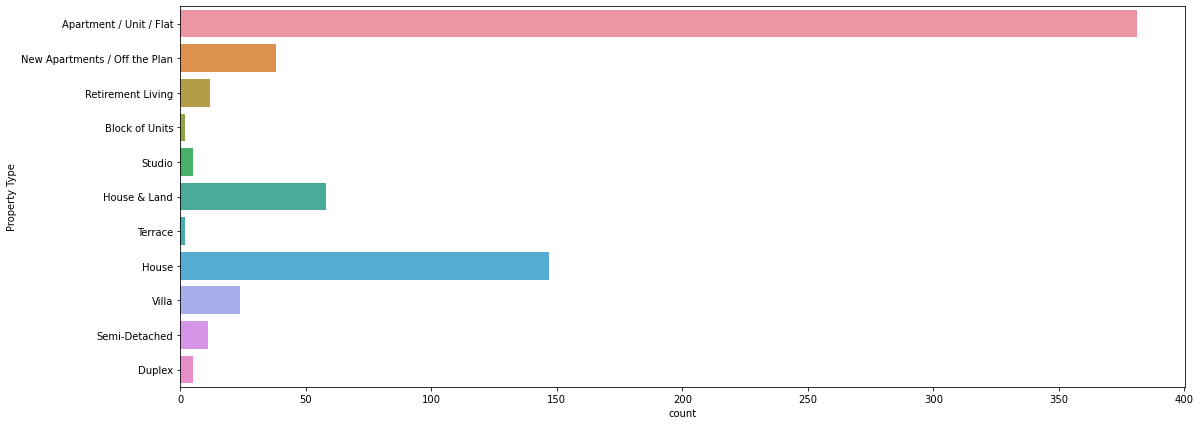

In [32]:
# Plot the figure above
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
sns.countplot(y="Property Type", data=dataWithEmptyValues)

We note that most of the empty values are coming from a property with type Apartment/Unit/Flat. The type of data missing was the size in squared metres.

# Begin Cleaning

## Feature 1: Price

In [34]:
prices = df['Price']
prices

0                       For Sale $1,500,000 - $1,600,000 
1       $570K TO $620K  ( SELLIG FAST - SPECTACULAR AP...
2              1 BED + STUDY  ( UNDER CONSTRUCTION NOW ) 
3       2 BEDROOM $570K ( SELLIG FAST - SPECTACULAR AP...
4       84 SQM INTERNAL  ( SELLIG FAST - SPECTACULAR A...
                              ...                        
1479                                    Guide $2,550,000 
1480                                             AUCTION 
1481                                 $345,000 - $365,000 
1482                         Fully Renovated Family Home 
1483                             AUCTION | Chris Kounnas 
Name: Price, Length: 1484, dtype: object

In [35]:
# Check how many are empty
prices.isnull().sum()

0

As price is our desired output variable, it is extremely important to have data for all fields. In the case that we don't have any actual price data, we will choose to remove it, else we will convert the number into an integer.

If a range is given, we will return the mean of the two numbers, as an estimate of the price of the property.

In [62]:
# Drop all columns with no $ sign in price
df[df['Price'].str.contains("$")]

,Unnamed: 0,Price,Suburb,Region,Postcode,Address,Size (m^2),Property Type,Beds,Baths,Parking,URL
0,0,"For Sale $1,500,000 - $1,600,000",ROSEBERY,NSW,2018,"1703/4 Mentmore Avenue,",NaN,Apartment / Unit / Flat,3 Beds,2 Baths,2 Parking,https://www.domain.com.au/1703-4-mentmore-aven...
1,1,$570K TO $620K ( SELLIG FAST - SPECTACULAR AP...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
2,2,1 BED + STUDY ( UNDER CONSTRUCTION NOW ),SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,1 Bed,1 Bath,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
3,3,2 BEDROOM $570K ( SELLIG FAST - SPECTACULAR AP...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
4,4,84 SQM INTERNAL ( SELLIG FAST - SPECTACULAR A...,SCHOFIELDS,NSW,2762,NaN,NaN,New Apartments / Off the Plan,2 Beds,2 Baths,1 Parking,https://www.domain.com.au/schofields-nsw-2762-...
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,1479,"Guide $2,550,000",NORTH MANLY,NSW,2100,"42 Corrie Road,",404m²,House,4 Beds,2 Baths,2 Parking,https://www.domain.com.au/42-corrie-road-north...
1480,1480,AUCTION,GRIFFITH,NSW,2680,"29a Konoa Street,",714m²,House,4 Beds,3 Baths,3 Parking,https://www.domain.com.au/29a-konoa-street-gri...
1481,1481,"$345,000 - $365,000",CESSNOCK,NSW,2325,"151 Alkira Avenue,",565m²,House,3 Beds,1 Bath,1 Parking,https://www.domain.com.au/151-alkira-avenue-ce...
1482,1482,Fully Renovated Family Home,NORTH ST MARYS,NSW,2760,"1 Cypress Road,",538m²,House,4 Beds,2 Baths,2 Parking,https://www.domain.com.au/1-cypress-road-north...


In [39]:
def cleanPriceData(price):
    
    # First we check if there is a $ sign in the price
    if "$" in price:
        return price
    

In [40]:
newPriceData = []

for i in range(len(prices)):
    
    cleanedData = cleanPriceData(prices[i])
    
    if cleanedData:
        newPriceData.append(cleanedData)

In [41]:
len(newPriceData)

649

In [42]:
print(newPriceData)

['For Sale $1,500,000 - $1,600,000 ', '$570K TO $620K  ( SELLIG FAST - SPECTACULAR APARTMENTS ) ', '2 BEDROOM $570K ( SELLIG FAST - SPECTACULAR APARTMENTS ) ', '1 BED ( under $450k) ', '$829,990 ', '$885,000 ', 'Price Guide $650,000 ', 'Guide $620,000 ', 'Guide | $879,000 ', '$576,000 ', 'Price Guide: $600,000 to $612,000 ', '$530,000 - $560,000 ', '$420,000 - $450,000 ', '$550,000 - $600,000 ', 'Guide $580,000 ', 'Auction Guide $660,000 ', 'Price Guide $349,000- $395,000 ', 'Guide $550,000 | Call for Inspection ', '$329,000 - $339,000 ', '$749000 ', '$536,000 - $906,000 ', '$536,000 - $906,000 ', '$499,000 - $549,000 ', '$359,950 ', '$600,000 - $2,200,000 ', '606,000 - $800,000 ', 'buyers guide $695,000 ', 'Price Guide: $1,530,000 ', 'Buyers guide $800,000 ', 'Guide | $799,000 ', '$780,000 - $799,000 ', 'Price Guide $840,000 to $875,000 ', '$47,000 ', '$619,000 ', '$2,750,000 ', '$520,000 ', '$620,000 - $650,000 ', '$439,000 ', '$895,000 to $1,020,000 ', 'Price Guide $520,000 - $540,0